# Import dependencies

In [ ]:
! pip install -q transformers datasets

In [ ]:
! pip install -U datasets huggingface_hub fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.0
    Uninstalling huggingface-hub-0.33.0:
      Successfully uninstalled huggingface-hub-0.33.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.

In [ ]:
from datasets import load_dataset

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
! pip install -q kaggle

# Downloading data from kaggle

In [ ]:
import os

# Create a directory for Kaggle and copy the kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
! chmod 600 ~/.kaggle/kaggle.json

# Download the dataset (replace with the correct dataset slug if needed)
! kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:13<00:00, 263MB/s]
100% 2.04G/2.04G [00:13<00:00, 162MB/s]


# Dataset Import and Unzip

In [ ]:
import zipfile
import os

# Get the name of the downloaded zip file
zip_file_name = "plantvillage-dataset.zip" # Replace if the zip file name is different

# Create a directory to extract the dataset into
extract_path = "plantvillage_dataset"
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")

Dataset extracted to plantvillage_dataset


## Loading dataset

In [ ]:
import os

In [ ]:
data_dir = os.path.abspath('./plantvillage_dataset/plantvillage dataset/color')
dataset = load_dataset("imagefolder", data_dir=data_dir)

Resolving data files:   0%|          | 0/54305 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 54305
    })
})


## Split into training and testing

In [ ]:
print(dataset["test"])

In [ ]:
split_dataset = dataset["train"].train_test_split(test_size = 0.2, seed = 42)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 43444
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10861
    })
})

In [ ]:
train_dataset = split_dataset["train"]

In [ ]:
test_dataset = split_dataset["test"]

# Print train dataset keys

In [ ]:
from PIL import Image

In [ ]:

print(dataset["train"].features)

{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf

In [ ]:
example = dataset["train"][0]

In [ ]:
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 0}

In [ ]:
first_image = example["image"]

In [ ]:
first_label = example["label"]

In [ ]:
print(first_label)

0


In [ ]:
print(type(first_image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
first_image.show()

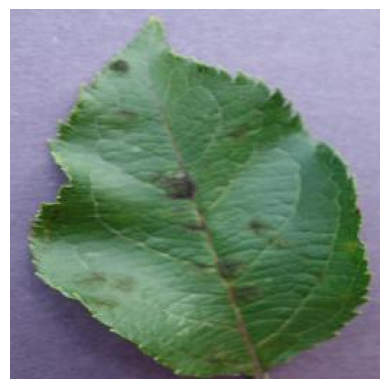

In [ ]:
plt.imshow(first_image)
plt.axis('off')  # Hide axes
plt.show()

# Label encoding

In [ ]:
# Get list of class names

In [ ]:
labels = dataset["train"].features["label"].names
print(labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
# Assign class Id to class Names and vice versa

In [ ]:
id2label = {k:v for k,v in enumerate(labels)}

In [ ]:
label2id = {v:k for v,k in enumerate(labels)}

In [ ]:
print(id2label[first_label])

Apple___Apple_scab


In [ ]:
print(labels[first_label])

Apple___Apple_scab


# Image processing

In [ ]:
from transformers import AutoImageProcessor

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("facebook/convnext-tiny-224")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
print("Image Processor:")
print(image_processor)

Image Processor:
ConvNextImageProcessor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}



## Preparing dataset for training

In [ ]:
from torchvision.transforms import Compose, Normalize, RandomHorizontalFlip,RandomResizedCrop, Resize, ToTensor, CenterCrop

In [ ]:
 # Normalize image
 normalize = Normalize(mean = image_processor.image_mean, std = image_processor.image_std)

In [ ]:
# Resize Image and Data Augmentation
transform = Compose([
        RandomResizedCrop(image_processor.size["shortest_edge"]),
        RandomHorizontalFlip(),
        ToTensor(),
        normalize
])

In [ ]:
def data_transform(examples):
  examples["pixel_values"] = [transform(image.convert("RGB")) for image in examples["image"]]
  return examples

In [ ]:
processed_train_dataset = train_dataset.with_transform(data_transform)
processed_test_dataset = test_dataset.with_transform(data_transform)

In [ ]:
print(processed_train_dataset[0])

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7C7ADCBCAAD0>, 'label': 29, 'pixel_values': tensor([[[ 0.6221,  0.6734,  0.7419,  ...,  0.8276,  0.9646,  1.0673],
         [-0.1486, -0.0629,  0.0741,  ...,  0.8961,  0.9303,  0.9646],
         [-1.2959, -1.1589, -0.9363,  ...,  0.9988,  0.8789,  0.7933],
         ...,
         [-1.8097, -1.7754, -1.7412,  ..., -1.3130, -1.3130, -1.3130],
         [-1.5357, -1.6213, -1.7754,  ..., -1.0733, -1.0219, -0.9877],
         [-1.3644, -1.5357, -1.7925,  ..., -0.9192, -0.8335, -0.7822]],

        [[ 0.6078,  0.6604,  0.7304,  ...,  0.7479,  0.8880,  0.9930],
         [-0.1625, -0.0574,  0.0651,  ...,  0.8179,  0.8529,  0.8880],
         [-1.3179, -1.1604, -0.9328,  ...,  0.9230,  0.8004,  0.7129],
         ...,
         [-1.4405, -1.4230, -1.4055,  ..., -0.8277, -0.8277, -0.8277],
         [-1.1604, -1.2654, -1.4405,  ..., -0.6527, -0.5826, -0.5301],
         [-0.9853, -1.1779, -1.4580,  ..., -0.5476, -0.4251, -0.337

In [ ]:
print("All normalized and transformed")

All normalized and transformed


## Preparing a pytorch dataloader

In [ ]:
import torch

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
def collate_fn(examples):
  pixel_values = torch.stack([example["pixel_values"] for example in examples])
  labels = torch.tensor([example["label"] for example in examples]) # Convert generator to list
  return {"pixel_values":pixel_values,"labels":labels}

## Dataloader for training and validation datasets

In [ ]:
train_dataloader = DataLoader(dataset = processed_train_dataset, collate_fn = collate_fn, batch_size = 8, shuffle = True)
val_dataloader = DataLoader(dataset = processed_test_dataset, collate_fn = collate_fn, batch_size = 8, shuffle = False)

In [ ]:
# first batch of train dataloader
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([8, 3, 224, 224])
labels torch.Size([8])


# Defining the model

In [ ]:
from transformers import AutoModelForImageClassification

In [ ]:
model = AutoModelForImageClassification.from_pretrained(
    "facebook/convnext-tiny-224",
    id2label = id2label,
    label2id = label2id,
    ignore_mismatched_sizes = True
)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/114M [00:00<?, ?B/s]

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-tiny-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([38, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([38]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Finetuninggggggggggg !!!

In [ ]:
import os
from tqdm import tqdm
save_dir = "./tomato_disease_classification/checkpoints"
os.makedirs(save_dir, exist_ok = True)

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr = 5e-5)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

In [ ]:
# Init variables to track the loss and accuracy
best_loss = float("inf")
epochs_without_improvement = 0
patience = 10
max_epochs =100

In [ ]:
for epoch in range(max_epochs):
  print(f"Epoch {epoch+1}/ {max_epochs}")
  train_loss = 0
  train_correct = 0
  train_total = 0

  # Training step
  model.train()
  for batch in tqdm(train_dataloader, desc = "Training"):
      batch = {k: v.to(device) for k,v in batch.items()} # move batch to gpu

      optimizer.zero_grad() # clear the gradients
      outputs = model(pixel_values = batch["pixel_values"], labels = batch["labels"]) # forward pass
      loss, logits = outputs.loss, outputs.logits # get the loss
      loss.backward() # backward pass
      optimizer.step() # Update the weights

      # Metrics
      train_loss += loss.item()
      train_total += batch["labels"].shape[0]
      train_correct += (logits.argmax(-1) == batch["labels"]).sum().item()

  # Calculate training metrics
  train_accuracy = train_correct / train_total
  avg_train_loss = train_loss / len(train_dataloader)
  print(f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

  # Validation Loop
  model.eval()
  val_loss = 0.0
  val_correct = 0
  val_total = 0

  with torch.no_grad():
    for batch in tqdm(val_dataloader, desc = "Validation"):
      batch = {k: v.to(device) for k,v in batch.items()} # Move batch to GPU
      outputs = model(pixel_values = batch["pixel_values"], labels = batch["labels"]) #fwd pass
      loss, logits = outputs.loss, outputs.logits # get the loss and logits

      val_loss += loss.item()
      val_total += batch["labels"].shape[0]
      val_correct += (logits.argmax(-1) == batch["labels"]).sum().item()


  # Calculate the validation metrics
  val_accuracy = val_correct / val_total
  avg_val_loss = val_loss / len(val_dataloader)
  print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

  # Check for improvement in validation loss
  if avg_val_loss < best_loss :
    best_loss = avg_val_loss
    epochs_without_improvement = 0

    # Save the best model
    checkpoint_path = os.path.join(save_dir,"best_model.pth")
    torch.save(model.state_dict(), checkpoint_path)
    print("Best model saved!")
  else:
    epochs_without_improvement += 1
    print(f"No improvement after {epochs_without_improvement} epoch/s")

  # Early stopping of the model
  if epochs_without_improvement >= patience:
    print(f"Early stopping at epoch {patience} due to lack of improvement.")
    break

Epoch 1/ 100


Training: 100%|██████████| 5431/5431 [12:58<00:00,  6.98it/s]


Training Loss: 0.0588, Training Accuracy: 0.9811


Validation: 100%|██████████| 1358/1358 [01:12<00:00, 18.66it/s]


Validation Loss: 0.0552, Validation Accuracy: 0.9831
Best model saved!
Epoch 2/ 100


Training: 100%|██████████| 5431/5431 [12:58<00:00,  6.97it/s]


Training Loss: 0.0510, Training Accuracy: 0.9840


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 18.90it/s]


Validation Loss: 0.0602, Validation Accuracy: 0.9808
No improvement after 1 epoch/s
Epoch 3/ 100


Training: 100%|██████████| 5431/5431 [12:57<00:00,  6.98it/s]


Training Loss: 0.0475, Training Accuracy: 0.9853


Validation: 100%|██████████| 1358/1358 [01:13<00:00, 18.48it/s]


Validation Loss: 0.0487, Validation Accuracy: 0.9849
Best model saved!
Epoch 4/ 100


Training: 100%|██████████| 5431/5431 [12:57<00:00,  6.98it/s]


Training Loss: 0.0420, Training Accuracy: 0.9869


Validation: 100%|██████████| 1358/1358 [01:12<00:00, 18.80it/s]


Validation Loss: 0.0524, Validation Accuracy: 0.9837
No improvement after 1 epoch/s
Epoch 5/ 100


Training: 100%|██████████| 5431/5431 [12:57<00:00,  6.98it/s]


Training Loss: 0.0379, Training Accuracy: 0.9875


Validation: 100%|██████████| 1358/1358 [01:13<00:00, 18.39it/s]


Validation Loss: 0.0438, Validation Accuracy: 0.9858
Best model saved!
Epoch 6/ 100


Training: 100%|██████████| 5431/5431 [12:57<00:00,  6.98it/s]


Training Loss: 0.0331, Training Accuracy: 0.9891


Validation: 100%|██████████| 1358/1358 [01:12<00:00, 18.67it/s]


Validation Loss: 0.0384, Validation Accuracy: 0.9885
Best model saved!
Epoch 7/ 100


Training: 100%|██████████| 5431/5431 [12:56<00:00,  6.99it/s]


Training Loss: 0.0345, Training Accuracy: 0.9895


Validation: 100%|██████████| 1358/1358 [01:12<00:00, 18.83it/s]


Validation Loss: 0.0567, Validation Accuracy: 0.9835
No improvement after 1 epoch/s
Epoch 8/ 100


Training: 100%|██████████| 5431/5431 [12:56<00:00,  6.99it/s]


Training Loss: 0.0330, Training Accuracy: 0.9899


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 18.90it/s]


Validation Loss: 0.0317, Validation Accuracy: 0.9890
Best model saved!
Epoch 9/ 100


Training: 100%|██████████| 5431/5431 [12:58<00:00,  6.97it/s]


Training Loss: 0.0316, Training Accuracy: 0.9897


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 18.95it/s]


Validation Loss: 0.0358, Validation Accuracy: 0.9892
No improvement after 1 epoch/s
Epoch 10/ 100


Training: 100%|██████████| 5431/5431 [12:59<00:00,  6.97it/s]


Training Loss: 0.0275, Training Accuracy: 0.9909


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 18.87it/s]


Validation Loss: 0.0329, Validation Accuracy: 0.9897
No improvement after 2 epoch/s
Epoch 11/ 100


Training: 100%|██████████| 5431/5431 [13:00<00:00,  6.96it/s]


Training Loss: 0.0278, Training Accuracy: 0.9911


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 19.00it/s]


Validation Loss: 0.0354, Validation Accuracy: 0.9882
No improvement after 3 epoch/s
Epoch 12/ 100


Training: 100%|██████████| 5431/5431 [13:00<00:00,  6.96it/s]


Training Loss: 0.0283, Training Accuracy: 0.9914


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 18.92it/s]


Validation Loss: 0.0493, Validation Accuracy: 0.9850
No improvement after 4 epoch/s
Epoch 13/ 100


Training: 100%|██████████| 5431/5431 [13:02<00:00,  6.94it/s]


Training Loss: 0.0246, Training Accuracy: 0.9919


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 18.90it/s]


Validation Loss: 0.0313, Validation Accuracy: 0.9895
Best model saved!
Epoch 14/ 100


Training: 100%|██████████| 5431/5431 [13:02<00:00,  6.94it/s]


Training Loss: 0.0251, Training Accuracy: 0.9921


Validation: 100%|██████████| 1358/1358 [01:11<00:00, 19.10it/s]


Validation Loss: 0.0490, Validation Accuracy: 0.9859
No improvement after 1 epoch/s
Epoch 15/ 100


Training:  32%|███▏      | 1748/5431 [04:10<08:28,  7.25it/s]

# Testing with test dataset

In [ ]:
from tqdm import tqdm

In [ ]:
val_dataloader = DataLoader(dataset = processed_test_dataset, collate_fn = collate_fn, batch_size = 8, shuffle = False)

In [ ]:
# Validation Loop
model.eval()
val_loss = 0.0
val_correct = 0
val_total = 0

with torch.no_grad():
  for batch in tqdm(val_dataloader, desc = "Validation"):
      batch = {k: v.to(device) for k,v in batch.items()} # Move batch to GPU
      outputs = model(pixel_values = batch["pixel_values"], labels = batch["labels"]) #fwd pass
      loss, logits = outputs.loss, outputs.logits # get the loss and logits

      val_loss += loss.item()
      val_total += batch["labels"].shape[0]
      val_correct += (logits.argmax(-1) == batch["labels"]).sum().item()


Validation:  31%|███▏      | 427/1358 [15:33<33:55,  2.19s/it]


KeyboardInterrupt: 

# Testing the model

In [ ]:
# Load the saved model

In [ ]:
from transformers import AutoImageProcessor

In [ ]:
from torchvision.transforms import Compose, Normalize, RandomHorizontalFlip,RandomResizedCrop, Resize, ToTensor, CenterCrop

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("facebook/convnext-tiny-224")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
from transformers import AutoModelForImageClassification

In [ ]:
from torchvision.transforms import Compose, Normalize, RandomHorizontalFlip,RandomResizedCrop, Resize, ToTensor, CenterCrop

In [ ]:
normalize = Normalize(mean = image_processor.image_mean, std = image_processor.image_std)

In [ ]:
# Resize Image and Data Augmentation
transform = Compose([
        RandomResizedCrop(image_processor.size["shortest_edge"]),
        ToTensor(),
        normalize
])

In [ ]:
device = "cpu"

In [ ]:
labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
id2label = {k:v for k,v in enumerate(labels)}

In [ ]:
label2id = {v:k for v,k in enumerate(labels)}

In [ ]:
model = AutoModelForImageClassification.from_pretrained(
    "facebook/convnext-tiny-224",
    id2label = id2label,
    label2id = label2id,
    ignore_mismatched_sizes = True
)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/114M [00:00<?, ?B/s]

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-tiny-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([38, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([38]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch

In [ ]:
checkpoint_path = "./best_model.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))
model.to(device)

ConvNextForImageClassification(
  (convnext): ConvNextModel(
    (embeddings): ConvNextEmbeddings(
      (patch_embeddings): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (layernorm): ConvNextLayerNorm()
    )
    (encoder): ConvNextEncoder(
      (stages): ModuleList(
        (0): ConvNextStage(
          (downsampling_layer): Identity()
          (layers): Sequential(
            (0): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              (pwconv1): Linear(in_features=96, out_features=384, bias=True)
              (act): GELUActivation()
              (pwconv2): Linear(in_features=384, out_features=96, bias=True)
              (drop_path): Identity()
            )
            (1): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              

In [ ]:
state_dict = torch.load(checkpoint_path,map_location=torch.device('cpu'))

In [ ]:
test_image_path = "/content/leaf.jpg"

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
image = plt.imread(test_image_path)

In [ ]:
from PIL import Image

In [ ]:
input_image = transform(Image.fromarray(image).convert("RGB")).unsqueeze(0).to(device)

In [ ]:
# Make predictions on single image
with torch.no_grad():
  output = model(pixel_values = input_image)
  logits = output.logits
  predicted_class_id = logits.argmax(-1).item()
  predicted_label = id2label[predicted_class_id]

In [ ]:
print(predicted_label)

Tomato___Late_blight


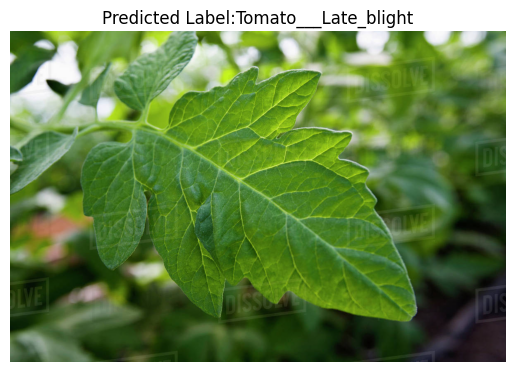

In [ ]:
plt.imshow(image)
plt.title(f"Predicted Label:{predicted_label}")
plt.axis('off')
plt.show()

# single prediction function

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

def predict_image(path):
  try:
    # Read the image using PIL for better compatibility with Image.fromarray
    image = Image.open(path).convert("RGB")

    # Apply transformations
    input_image = transform(image).unsqueeze(0).to(device)

    # Make predictions
    # model.eval() # Set model to evaluation mode
    with torch.no_grad():
      output = model(pixel_values = input_image)
      logits = output.logits
      predicted_class_id = logits.argmax(-1).item()
      predicted_label = id2label[predicted_class_id]

    # Display the image with the predicted label
    plt.imshow(image)
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

  except FileNotFoundError:
    print(f"Error: Image file not found at {path}")
  except Exception as e:
    print(f"An error occurred during prediction: {e}")

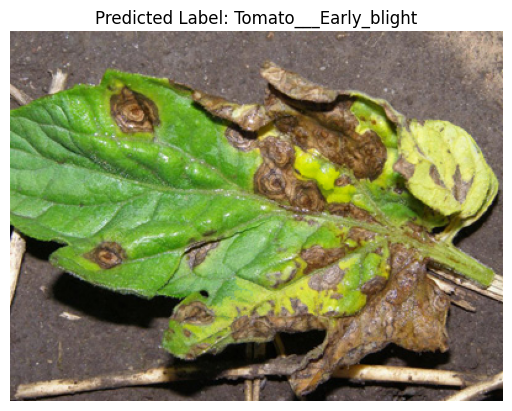

In [ ]:
predict_image("/content/early-blight1.jpg")

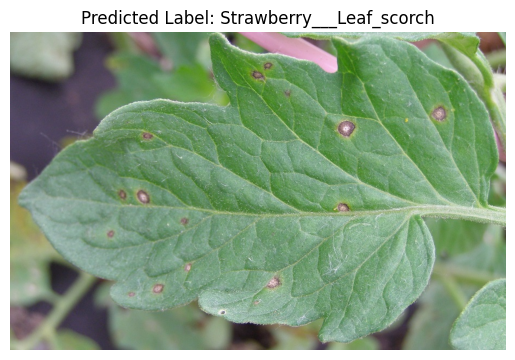

In [ ]:
predict_image("/content/tomato-septoria-leaf-spot-grabowski.jpg")